In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# Revision of ID2214 Programming for Data Science

In [24]:
df1 = pd.DataFrame({"LKey": list("acdef"),
"A":[0,0,0,1,1]})
df2 = pd.DataFrame({"RKey": list("fedba"),
"B":[0,0,1,1,1]})
df1.merge(df2,how="outer",left_on="LKey",right_on="RKey")

df1["A"] = df1["A"].astype("category")
df1["A"].cat.categories

Int64Index([0, 1], dtype='int64')

## 1 Introduction to Python

## 2 NumPy and pandas

## 3 Data preparation and evaluation

* The instances need to be represented by fixed-length feature vectors
* Information from test instances should not affect choice of data preparation and learning algorithms
* there can be no missing numerical or categorical values
* numerical features have to be normalized
* curse of dimensinality has to be remedied by limiting the number of features



### 3.1 Handling missing values
remove/impute(mean, mode, nearest neighbors)

In [28]:
df = pd.DataFrame({"id":[np.nan, 2, 3, 4, 5],
                  "grade":[np.nan, "b", np.nan, "c", np.nan],
                  "award":[np.nan, "gold", "silver", "bronze", np.nan]})
display(df)
# axis="index" is default
display(df.dropna(how="any", axis="index"))
# drop when grade, award is all missing
display(df.dropna(how="all", subset=["grade", "award"]))

,id,grade,award
0,NaN,NaN,NaN
1,2.0,b,gold
2,3.0,NaN,silver
3,4.0,c,bronze
4,5.0,NaN,NaN


,id,grade,award
1,2.0,b,gold
3,4.0,c,bronze


,id,grade,award
1,2.0,b,gold
2,3.0,NaN,silver
3,4.0,c,bronze


In [19]:
# impute missing values

df = pd.DataFrame({"id":[np.nan, 2, 3, 4, 5],
                  "grade":[np.nan, "b", np.nan, "c", np.nan],
                  "award":[np.nan, "gold", "silver", "bronze", np.nan]})
display(df)
# grade "e", "award" "iron"
display(df.fillna(value={"grade": "e", "award": "iron"}))
# impute with mean
display(df["id"].fillna(df["id"].mean(), inplace=False))
# impute with mode
df["award"].fillna(df["award"].mode()[0], inplace=True)
display(df)

,id,grade,award
0,NaN,NaN,NaN
1,2.0,b,gold
2,3.0,NaN,silver
3,4.0,c,bronze
4,5.0,NaN,NaN


,id,grade,award
0,NaN,e,iron
1,2.0,b,gold
2,3.0,e,silver
3,4.0,c,bronze
4,5.0,e,iron


0    3.5
1    2.0
2    3.0
3    4.0
4    5.0
Name: id, dtype: float64

,id,grade,award
0,NaN,NaN,bronze
1,2.0,b,gold
2,3.0,NaN,silver
3,4.0,c,bronze
4,5.0,NaN,bronze


### 3.2 Encoding features: from numerical to categorical (Discretization)

equal width: each range is the same size  
equal size: the same number of observed values fall into each range

In [40]:
# equal width: each range is the same size
# one column of 100 random values
df = pd.DataFrame({"values":np.random.rand(100)})
res, bins = pd.cut(df["values"], 10, retbins=True)
display(bins)
display(res)

bins[0], bins[-1]=-np.inf, np.inf
# bins
df2 = pd.DataFrame({"values":np.ones(100)})

# apply bins to new(test) data
new_res = pd.cut(df2["values"], bins)

display(new_res)

array([0.00241647, 0.10305879, 0.20270466, 0.30235052, 0.40199639,
       0.50164225, 0.60128812, 0.70093399, 0.80057985, 0.90022572,
       0.99987158])

0       (0.302, 0.402]
1           (0.9, 1.0]
2       (0.601, 0.701]
3           (0.9, 1.0]
4       (0.203, 0.302]
            ...       
95      (0.601, 0.701]
96    (0.00242, 0.103]
97      (0.302, 0.402]
98      (0.402, 0.502]
99      (0.103, 0.203]
Name: values, Length: 100, dtype: category
Categories (10, interval[float64]): [(0.00242, 0.103] < (0.103, 0.203] < (0.203, 0.302] < (0.302, 0.402] ... (0.601, 0.701] < (0.701, 0.801] < (0.801, 0.9] < (0.9, 1.0]]

0     (0.9, inf]
1     (0.9, inf]
2     (0.9, inf]
3     (0.9, inf]
4     (0.9, inf]
         ...    
95    (0.9, inf]
96    (0.9, inf]
97    (0.9, inf]
98    (0.9, inf]
99    (0.9, inf]
Name: values, Length: 100, dtype: category
Categories (10, interval[float64]): [(-inf, 0.103] < (0.103, 0.203] < (0.203, 0.302] < (0.302, 0.402] ... (0.601, 0.701] < (0.701, 0.801] < (0.801, 0.9] < (0.9, inf]]

eqaul sized binning will leads to bins for which the observed frequencies are nearly the same. It is more informative when being used before Naive-Bayes because the other one, equal-width binning will possibly put most of the observations into one bin, hence not allowing the learning algorithms to distinguish between the classes using discretized features.
Equal-width binning may be helpful when we want to inspect how features are distributed(e.g. whether they form the normal distribution or not).(plot)

In [35]:
# equal-sized binning (using qcut)
df = pd.DataFrame({"values": np.random.randn(100)})
res, bins = pd.qcut(df["values"],10,retbins=True)
display(bins)
display(res)

array([-2.14096076, -1.17425366, -0.96843002, -0.61919754, -0.34723074,
       -0.08324453,  0.1207581 ,  0.31629024,  0.62042679,  1.12610787,
        1.93455278])

0     (-0.347, -0.0832]
1        (0.121, 0.316]
2         (0.316, 0.62]
3         (0.62, 1.126]
4      (-0.0832, 0.121]
            ...        
95     (-0.968, -0.619]
96     (-1.174, -0.968]
97     (-0.0832, 0.121]
98       (0.121, 0.316]
99     (-2.142, -1.174]
Name: values, Length: 100, dtype: category
Categories (10, interval[float64]): [(-2.142, -1.174] < (-1.174, -0.968] < (-0.968, -0.619] < (-0.619, -0.347] ... (0.121, 0.316] < (0.316, 0.62] < (0.62, 1.126] < (1.126, 1.935]]

### 3.3 Encoding features: from categorical to numerical (One-Hot encoding)
a new binary feature is created for each possible categorical value, and the new feature values for an instance are all assigned zero except for the feature corresponding to the categorical value appearing in the original row.

e.g.
one feature `color` has samples belonging to three categories `brown`, `red`, `green`
now create three feature columns `color-brown`, `color-red`, `color-green` which only involve binary values. if samples belong to one feature, then they get 1, otherwise 0 in that feature column in their own rows.

* notice feature explosion

In [8]:
# convert category features of a dataframe into one_hot encoding
def create_one_hot(df):
    df_dict = dict()
    one_hot = dict()
    for i in df.columns:
        if i!="ID":
            for c in sorted(df[i].unique()):
                # generate one new feature column
                df_dict[i+"-"+c] = [1.0 if k==c else 0.0 for k in df[i]]
                if i not in one_hot:
                    one_hot[i] = [c]
                else:
                    one_hot[i].append(c)
    new_df = pd.DataFrame(df_dict)
    new_df.insert(0, "ID", df["ID"])
    return new_df, one_hot

def apply_one_hot(df, one_hot):
    df_dict = {}
    for col in one_hot:
        for c in one_hot[col]:
            df_dict[col+"-"+c] = [1.0 if c==k else 0.0 for k in df[col]]
    
    new_df = pd.DataFrame(df_dict)
    new_df.insert(0, "ID", df["ID"])
    return new_df

dataframe = pd.DataFrame({"ID":[1,2,3,4,5], "color":["green","red","yellow","green","red"]})
new_df, one_hot = create_one_hot(dataframe)
display(new_df)

test_dataframe = pd.DataFrame({"ID":[1,2,3,4,5], "color":["brown","grey","yellow","green","red"]})
test_new_df = apply_one_hot(test_dataframe, one_hot)
display(test_new_df)

,ID,color-green,color-red,color-yellow
0,1,1.0,0.0,0.0
1,2,0.0,1.0,0.0
2,3,0.0,0.0,1.0
3,4,1.0,0.0,0.0
4,5,0.0,1.0,0.0


,ID,color-green,color-red,color-yellow
0,1,0.0,0.0,0.0
1,2,0.0,0.0,0.0
2,3,0.0,0.0,1.0
3,4,1.0,0.0,0.0
4,5,0.0,1.0,0.0


### 3.4 Encoding features: normalization
min-max **normalization**
Attributes are often normalized
to lie in a fixed range—usually from zero to one—by dividing all values by the
maximum value encountered or by subtracting the minimum value and dividing
by the range between the maximum and minimum values

$xnorm = \frac{xi-xmin}{xmax-xmin}$

z-normalization (**standardization**)
calculate the statistical mean and standard deviation of the attribute values, subtract the mean from each value, and divide the result by the standard deviation.

$z = \frac{xi-xmean}{SD}$

and

$SD = \sqrt \frac{\sum_i^n (x_i - xmean)^2}{n}$ 

In [11]:
df = pd.DataFrame({"values": np.random.randn(100)})
min = df["values"].min()
max = df["values"].max()
df["values"] = [(x-min)/(max-min) for x in df["values"]]
print("min-max normalization:")
display(df)

df = pd.DataFrame({"values": np.random.randn(100)})
mean = df["values"].mean()
std = df["values"].std()
df["values"] = df["values"].apply(lambda x: (x-mean)/std)
print("z-normalization:")
display(df)

min-max normalization:


,values
0,0.769140
1,0.219020
2,0.621250
3,0.366393
4,0.357488
...,...
95,0.527664
96,0.519710
97,0.267881
98,0.649702


z-normalization:


,values
0,-0.242194
1,0.216455
2,0.561687
3,-0.307243
4,-0.779873
...,...
95,-1.415000
96,-0.014525
97,1.747559
98,-1.560561


### 3.5 Encoding features: dimensinality reduction
1. Feature selection
1.1 Filtering approaches
ranking the input features based on the correlation with the output (target) feature, using information gain
1.2 Wrapper approaches
iteratively choosing features based on their effect/presence in models generated by a specific learning algorithms

2. Principal Component Analysis(PCA)
projecting multiple numerical features into new features by a **linear combination**, ordered by the amount of variability they can account for, from which the (k) highest ranked are chosen. (O(p^2n+n^3))

3. Random Projection (RP)
projecting multiple numerical features into (k) new features using a sparse random matrix; computationally not so costly.
(O(pnk))


Exams:
  
1 Will mean-value imputation have the same effect, if performed
before normalization, on the distribution of the normalized
values for those values that were originally not missing, for
min-max normalization and z-normalization? Explain your
reasoning.  

2 Will the use of min-max normalization prior to the use of
equal-sized binning have any effect on model building
compared to just using equal-sized binning (without
normalization)? Explain your reasoning.

In [18]:
# Question 1
# Will mean-value imputation have the same effect, if performed before normalization,
# on the distribution of the normalized values for those values that were originally not missing, 
# for min-max normalization and z-normalization? Explain your reasoning.
print("original dataframe")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
display(df)
print("mean-value imputation + minmax normalization:")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
# firstly mean value imputation
df["values"].fillna(df["values"].mean(), inplace=True)
# and then minmax normalization
df["values"] = df["values"].apply(lambda x: (x-df["values"].min())/(df["values"].max()-df["values"].min()))
display(df)

print("minmax normalization + mean-value imputation:")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
# firstly mean value imputation
df["values"].fillna(df["values"].mean(), inplace=True)
# and then minmax normalization
df["values"] = df["values"].apply(lambda x: (x-df["values"].min())/(df["values"].max()-df["values"].min()))
display(df)

print("mean-value imputation + z-normalization:")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
# firstly mean value imputation
df["values"].fillna(df["values"].mean(), inplace=True)
# and then z normalization
df["values"] = df["values"].apply(lambda x: (x-df["values"].mean())/df["values"].std())
display(df)

print("z-normalization + mean-value imputation :")
df = pd.DataFrame({"values":[2,2,2,np.nan,5]})
# firstly z normalization
df["values"] = df["values"].apply(lambda x: (x-df["values"].mean())/df["values"].std())
# and then mean value imputation
df["values"].fillna(df["values"].mean(), inplace=True)
display(df)

original dataframe


,values
0,2.0
1,2.0
2,2.0
3,NaN
4,5.0


mean-value imputation + minmax normalization:


,values
0,0.00
1,0.00
2,0.00
3,0.25
4,1.00


minmax normalization + mean-value imputation:


,values
0,0.00
1,0.00
2,0.00
3,0.25
4,1.00


mean-value imputation + z-normalization:


,values
0,-0.577350
1,-0.577350
2,-0.577350
3,0.000000
4,1.732051


z-normalization + mean-value imputation :


,values
0,-0.5
1,-0.5
2,-0.5
3,0.0
4,1.5


Answer:  
As tested above, mean value imputation can be applied before or after min-max normalization and there is no difference 
However, mean value imputation applied before or after z-normalization is different and a as shown in the test, firstly apply imputation will cause a wider span of values.

That of course is due to min-max is linear but z-normalization is non-linear so the sequence is important to z-transformation.

Actually,  
The estimated standard deviation is used as a denominator when z-normalization is applied, and since this will be reduced due to that missing values will be replaced by the mean, it means that values that are different from the mean will end up more far away from the mean after missing values have been imputed. As the minimum and maximum values are not affected by mean-value imputation, min-max normalization will result in the same values as before

In [25]:
# question 2
# Will the use of min-max normalization prior to the use of equal-sized binning have 
# any effect on model building compared to just using equal-sized binning (without normalization)? 
# Explain your reasoning.

print("apply min-max normalization before discretization (equal-sized binning):")
df = pd.DataFrame({"values":[0,1,2,3,4,5,99,100]})
# apply min-max normalization before discretization (equal-sized binning)
df["values"] = df["values"].apply(lambda x: (x-df["values"].min())/(df["values"].max()-df["values"].min()))
res, bins = pd.qcut(df["values"], 5, retbins=True, labels=False)
df["values"] = res.astype("category")
display(df)

print("apply equal-sized binning only:")
# only apply binning
df = pd.DataFrame({"values":[0,1,2,3,4,5,99,100]})
res, bins = pd.qcut(df["values"], 5, retbins=True, labels=False)
df["values"] = res.astype("category")
display(df)

apply min-max normalization before discretization (equal-sized binning):


,values
0,0
1,0
2,1
3,2
4,2
5,3
6,4
7,4


apply equal-sized binning only:


,values
0,0
1,0
2,1
3,2
4,2
5,3
6,4
7,4


Answer:

applying min-max normalization or not before discretization does not have any effect on the final results

### 3.6 Evaluation protocols
* Stratified split=class proportions are approximately the same
* N-fold cross-validation (stratified cross-validation)  

class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)

* Predicted class  
prediction +- decides positive or negative  
prediction==real decides true or false

|     |(predict)+    |(predict)- |
| --- | --- | --- |
|(real)+|True positive |false negative|
|(real)-|false positive|true negative |

### 3.7 Performance metrics for classification
* Accuracy: fraction of correct predictions  
Accuracy = (tp + tn)/(tp+fp+tn+fn)

`memorize it with tp`

* Precision: fraction of correct predictions for a class  
Precision = tp/(tp+fp)

for judge someone has commited a crime, need a high precision fp should be low

* Recall: fraction of certain class correctly predicted
Recall = tp/(tp+fn)

for Earthquake detection, need a high recall (fn should be low)

`memorize it horizontally`

* TP rate (same as Recall)
TPR = tp/(tp+fn)

* FP rate
FPR = fp/(fp+tn)

> select TPR and FPR as the metrics of ROC/AUC, the reason is to avoid the bad effect of inbalanced samples  
TPR only consider the real+ coverage and FPR only consider the real- coverage and do nothing to each other  
so however the sample are inbalanced, the ROC curve do not change

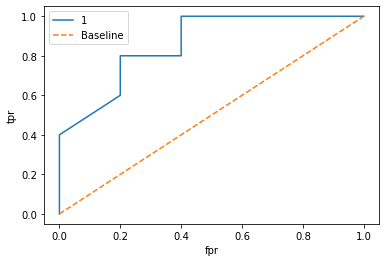

In [2]:
import matplotlib.pyplot as plt
pos = [1,1,1,1,0,1,0,0]
neg = [0,0,1,0,1,0,2,1]
tpr = [cs/sum(pos) for cs in np.cumsum(pos)]
fpr = [cs/sum(neg) for cs in np.cumsum(neg)]
plt.plot([0.0]+fpr+[1.0],[0.0]+tpr+[1.0],"-",label="1")
plt.plot([0.0,1.0],[0.0,1.0],"--",label="Baseline")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

In [7]:
def auc(df,correctlabels):
    new_df=df.copy()
    lens=len(correctlabels)
    cols=new_df.columns.tolist()
    print(cols)
    if len(cols)<3: #binary ;only Pos and Neg
        pos=[i for i in range(lens)  if correctlabels[i]==cols[0]]
        neg=[i for i in range(lens)  if correctlabels[i]!=cols[0]]                    
        print(pos,neg)
        one=new_df[cols[0]]
        auc = 0
        for i in pos:
            for j in neg:
                if one[i] > one[j]:
                    auc += 1
                elif one[i] == one[j]:
                    auc += 0.5

        return auc / (len(pos)*len(neg))
    else:      # CLASS >=3   Pos / non-Pos
        aucs=[]
        for col in cols:
            pos=[i for i in range(lens)  if correctlabels[i]==col]
            nonpos=[i for i in range(lens)  if correctlabels[i]!=col]                      
            print(pos,nonpos)
            one=new_df[col]
            auc = 0
            for i in pos:
                for j in nonpos:
                    if one[i] > one[j]:
                        auc += 1
                    elif one[i] == one[j]:
                        auc += 0.5
            auc=auc/(len(pos)*len(nonpos))
            aucs.append(auc)
        weights=[correctlabels.count(col)/len(correctlabels) for col in cols ]
        print(weights)
        print(aucs)

        weights=np.array(weights)
        aucs=np.array(aucs)
        avg_auc=np.sum(aucs*weights)
        return avg_auc

# test
predictions = pd.DataFrame({"A":[0.5,0.5,0.5,0.25,0.25],"B":[0.5,0.25,0.25,0.5,0.25],"C":[0.0,0.25,0.25,0.25,0.5]})

correctlabels = ["B","A","B","B","C"]

print("AUC: {}".format(auc(predictions,correctlabels)))

['A', 'B', 'C']
[1] [0, 2, 3, 4]
[0, 2, 3] [1, 4]
[4] [0, 1, 2, 3]
[0.2, 0.6, 0.2]
[0.75, 0.8333333333333334, 1.0]
AUC: 0.8500000000000001


* Brier score(quadratic loss): also known as mean squared error(MSE)
\begin{equation}
Brier score=\frac{1}{n}\sum_{i=1}^n (p_i-o_i)^2
\end{equation}
where $p_i$ are the predicted and $o_i$ the actual(observed) **probabilities** for test instance i, where usually all values are 0 except 1 of the true class label)


### 3.8 Performance metrics for regression

where $p_i$ is the predicted and $o_i$ the actual (observed) target
**(regression) value** for test instance i
* MSE  
\begin{equation}
MSE=\frac{1}{n}\sum_{i=1}^n (p_i-o_i)^2
\end{equation}

* Log loss
\begin{equation}
Log loss=\frac{1}{n}\sum_{i=1}^n o_i log p_i
\end{equation}

* RMSE  
square root of MSE

* Mean Absolute Error (MAE)  
\begin{equation}
MAE=\frac{1}{n}\sum_{i=1}^n |p_i-o_i|
\end{equation}

* Pearson correlation coefficient

Exam Questions  
1.
Assume that we have two classification models M1 and M2
that are evaluated on five test instances. Show with an
example that M1 can have a higher accuracy than M2, while
at the same time M2 has a higher area under the ROC curve
(AUC) than M1.

Answer:
```
y_real = [1,0,0,0,0]

M1_pred = [0,0,0,0,0]
M2_pred = [1,0,0,1,1]
```
In this case, we can get the confusion matrix as following:

||pos|neg|
| --- | --- | --- |
|M1|||
|true|0|1|
|false|0|4|
|M2|||
|true|1|0|
|false|2|2|

and calculate the accuracy, where M1 is 0.8 and M2 is 0.6. Simutaneously, for the AUC, M1 is 0 and M2 is 0.75.  

> The area under the ROC curve (AUC) = the probability of an example belonging to the class being ranked ahead of an example not belonging to the class
so for M2, when there is one p(positive) and 4 n(negative) real cases, we predict p1:1.0, n1:1.0, n2:1.0, n3:0.0, n4:0.0. AUC = (0.5+0.5+1.0+1.0)/(1*4)=0.75


2.
Assume that we have generated a regression model for predicting the outdoor temperature using a large training set. However, we then find out that the MSE of the model is significantly higher than of a default model, which just predicts the average outdoor temperature in the training set. Could our model still be more useful for prediction tasks than the default model?

Answer:

If we would be interested in finding out which dats are expected to be the warmest, e.g., when planning some outdoor activities, then we are more interested in the correlation between the predicted and actual temperatures, rather than being interested primarily in the absolute temperatures. The trained model with a poorer MSE may hence be more useful for this purpose than the default model, it the correlation coefficient of the former is positive(while this is not the case for the default model)

## 4 Linear Models

use linear models when:  
* Small number of training data
* Low signal-to-noise  
* Sparse data  

The model of choice is in for of $y=w_0+\sum_{j=1}^m x_j w_j + \epsilon$

where input vector is $x=(x_1,...,x_m)$  
output is y  
and weight is $w_j$ also known as regressor that are unknown 
$\epsilon$ is the unobserved error term that has the mean of zero: $\epsilon ~ N(0, \sigma^2)$

The goal is to find such w to make the value of cost function(MSE or RSS) as low as possible.

To minimize the RSS: 


$RSS_{min} = min_w (Y-XW)^T(Y-XW)$

We can prove the weight to achieve the minimal RSS is:

$W = (X^TX)^{-1}X^Ty$



In [14]:
# linear regression
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# use the above formula to calculate W, estimate to find the approximate bias 4, weight 3
# add bias x0=1 to each instance, which is the bias (x0 can be an arbitrary number but not 0)
# https://www.quora.com/Why-add-extra-ones-as-first-column-of-data-in-machine-learning
# np.c_ is to concat two arrays by row
# np.r_ is to concat two arrays by column
X_b = np.c_[np.ones((100,1)), X]
# linear algebra module
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# display the two weights corrsponding to bias 1 and X
display(w_best)

# predict using the w_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add the bias 1 to each intance
y_predict = X_new_b.dot(w_best)
display(y_predict)  # 4+3*X + 1 estimated to 10

array([[4.35278074],
       [2.73088907]])

array([[4.35278074],
       [9.81455889]])

The aboved method, which directly compute the most appropriate parameters of the model, is a so-called close form method. 

However, the time complexity is between $O(n^{2.4})$ to $O(n^3)$ due to the inverse computation, which is very high.

So we should introduce **Gradient Descent**.

repeating updating weights until the output is close enough to the estimated output

$ w_i := w_i - \frac{t}{m}\sum_{i=1}^m(y-y_i)^2*x_0$

We should also examine the **Logistic Regression**, which use the `binary cross entropy` as the cost function and yield the categorical output.

$h_w(X) = g(W^TX)$

$g(z)=\frac{1}{e^{-z}+1}$

if $g(z)>=0.5$  Y=1, else  Y=0

The lost function is 

$J(w) = -\frac{1}{m}\sum_i^my_ilog(h_w(x_i)) + (1-y_i)log(1-h_w(x_i))$

Inference:

When $W^TX<0$, the predicted label is $Y=0$

When $W^TX>0$, the predicted label is $Y=1$

* The reason that it do not use MAE but binary cross entropy is that the derivative of sigmoid will be zero.

* Unlike the case of linear regression, minimizing cross entropy cannot lead to a closed form solution because of the unlinearity of the sigmoid. 


Regularization is a technique one uses to 
* prevent overfitting (the model cannot generalize well to the test/unseen data)
* when learning is ill-posed (when there are more features than instances)

L1 regularization (Lasso)  
$\sum_1^n(y-y_i)^2 + \lambda\sum_1^n|w_i|$

L2 regularization
$\sum_1^n(y-y_i)^2 + \lambda\sum_1^nw_i^2$

Elastic net

$\sum_1^n(y-y_i)^2 + \lambda\sum_1^n|w_i| + \lambda\sum_1^nw_i^2$

> the rationale for choosing polynomial is that it is almost impossible to show the feature of regularization in 2 dimensions!

## 5 Naive Bayes and KNN

### 5.1 Naive Bayes theorem

two equations:
1. 
$P(H|E) = \frac{P(H)P(E|H)}{P(E)}$
2.
$P(x_1 \& x_2 \&... \&x_m|c) = P(x_1|c)P(x_2|c)...P(x_m|c)$


If we want to get the probability of a result (e.g. r, can be + or -) when several conditions (e.g. c) happen, we can write following equation:

$P(r_+|c1 \& c2 \& c3)$

However, we cannot compute the probability directly with this equation

So we use the first equation

$P(r_+|c1 \& c2 \& c3) = \frac{P(r_+)P(c1 \& c2 \& c3|r_+)}{P(c1 \& c2 \& c3)}$

$P(r_+|c1 \& c2 \& c3) = \frac{P(r_+)P(c1 \& c2 \& c3| r_+)}{P(c1 \& c2 \& c3, r_+) + P(c1 \& c2 \& c3, r_-)}$

$P(r_+|c1 \& c2 \& c3) = \frac{P(r_+)P(c1 \& c2 \& c3| r_+)}{P(r_+)P(c1 \& c2 \& c3| r+) + P(r_-)P(c1 \& c2 \& c3| r-)}$


use the second equation

$P(r_+|c1 \& c2 \&c3) = \frac{P(r_+)P(c1|r_+)P(c2|r_+)P(c3|r_+)}{P(r_+)P(c1|r_+)P(c2|r_+)P(c3|r_+) + P(r_-)P(c1|r_-)P(c2|r_-)P(c3|r_-)}$

where each term can be easily obtained from the original dataframe

* What if some condition there is no records?  
To prevent from dividing by zero, sometimes we should use **Laplace correction**, which add each condition by 1 to ensure that no 0 would be in the denominator.

* What if some feature value is missing (np.nan) for an instance  
For a test instance: ignore the feature when calculating class probabilities  
For a training instance: ignore the feature when updating counts

* What if some feature is numerical?  
Employ discretization(binning)  
Use a probability density function (assume normal distribution)

In [7]:
import pandas as pd
dataframe = pd.DataFrame({"ID":["e1","e2","e3","e4","e5","e6"],
                        "Other":["yes","yes","no","yes","yes","no"], 
                         "Bar":["no","no","yes","no","no","yes"],
                         "Fri/Sat":["no","no","no","yes","yes","no"],
                        "Hungry":["yes","yes","no","yes","no", "yes"],
                        "Guests":["some","full","some","full","none","some"],
                        "Wait":["yes","no","yes","yes","no","yes"]})
display(dataframe)

,ID,Other,Bar,Fri/Sat,Hungry,Guests,Wait
0,e1,yes,no,no,yes,some,yes
1,e2,yes,no,no,yes,full,no
2,e3,no,yes,no,no,some,yes
3,e4,yes,no,yes,yes,full,yes
4,e5,yes,no,yes,no,none,no
5,e6,no,yes,no,yes,some,yes


In [26]:
df = dataframe.copy()
df["Wait"] = df["Wait"].astype("category")
display(df["Wait"].value_counts().to_dict())
display(df.groupby(["Wait","Bar"]).size().to_dict())

{'yes': 4, 'no': 2}

{('no', 'no'): 2, ('no', 'yes'): 0, ('yes', 'no'): 2, ('yes', 'yes'): 2}

In [39]:
# implement a simple NaiveBayes
# omit possible steps of imputation, discretization and column filter
def fit(dataframe):
    df = dataframe.copy()
    
    feature_class_counts = {}
    # a mapping from a col to a dictionary((c,v),num of this combination)
    feature_class_value_counts = {}
    
    df["Wait"] = df["Wait"].astype("category")
    
    feature_class_counts = df["Wait"].value_counts().to_dict()
    
    for col in df.columns:
        if col not in ["Wait", "ID"]:
            feature_class_value_counts[col] = df.groupby(["Wait",col]).size().to_dict()
    
    return feature_class_value_counts, feature_class_counts

In [102]:
# predict
# want to know the probability of "wait" to be "yes" when 
# following conditions are true
# "hungry" : "yes"
# "Guests" : "full"
# "Bar" : "no"
feature_class_value_counts, feature_class_counts = fit(df)
prediction_df = pd.DataFrame({"Wait":['yes'],
                              "Hungry":["yes"], 
                              "Guests":["full"],
                             "Bar":["no"]})
# display(prediction_df)

# display(feature_class_counts)
wait_class = prediction_df["Wait"][0] # wait yes



prob_wait_class = feature_class_counts[wait_class] / sum(feature_class_counts.values())

prob_nominator = prob_wait_class

prediction_df.drop(columns="Wait", inplace=True)
for i in prediction_df.columns:
    prob_nominator *= feature_class_value_counts[i][(wait_class, prediction_df[i][0])] / feature_class_counts[wait_class]

# display(feature_class_value_counts)

prob_denominator = 0

for c in feature_class_counts.keys():  # yes, no
    prob_denominator_class = feature_class_counts[c] / sum(feature_class_counts.values())
    for i in prediction_df.columns:  # "Hungry"...
        prob_denominator_class *= feature_class_value_counts[i][(c,prediction_df[i][0])] / feature_class_counts[c]
        
    prob_denominator += prob_denominator_class

print("probability of 'wait' to be yes, when hungry is yes, Guests is full and bar is no:")
prob_res = prob_nominator / prob_denominator
print(prob_res)                                      
    


probability of 'wait' to be yes, when hungry is yes, Guests is full and bar is no:
0.4285714285714286


### 5.2 KNN

Input: test instance e, training examples E, constant k  
Output: class label c  

Let N be the k closest instances to e in E  
Let c be the majority class of N

To calculate the distance  
* categorical features are converted to numerical  
* missing values are imputed
* numerical features are **normalized**

In practice  
* size grows with the number of training instances, which may prevent the algorithm from being used in resource-constrained environments
* The computational bottleneck is during predictions, as each test instance requires distance calculation for all trainining instances
* speed up (reduce dimensionality; sample training data or prototype selection; partitioning the feature space e.g. by k-d trees)


```python
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum(np.power(row1 - row2, 2), axis=0))
```

During training of KNN, we just need to preprocess the dataset (one-hot to numerical, imputation and normalize). When predicting, we should calculate the euclidean distance of the test row to all the training row. Then we sort the distance and find the K rows with the least distance and then, let the majority class be the class of the test row.

## 6 Artificial Neural Networks

When the number of dimensions grow, the number of cells(regions) grows exponentially, so we would need a large quantity of training data to ensure that those cells are not empty. It may be impossible to get such data but still feasible to make sense because

* The real data is usually confined to a region of space with low effective dimensions
* Real data in high dimension shows smoothness, at least locally and small changes in the input variable will still produce small changes in the target variables

Neural networks: Input layer, hidden layer, output layer  
Without a hidden layer, it's a logistic regression

In the hidden layer, we have  
$y=g(w^Tx+w_0)$  
and g(.) is called an **activation function** and has `Non-linearity`, `Monotonicity` and `Differentiability`. e.g. Sigmoid, ReLu, Tanh

In numpy implementation, Decision boundary will become more thick when learning rate goes down.

Possible regularization techniques
* L1/L2 regularization
* Dropout
* Early stopping

The implementation by numpy

```python
import numpy as np

def loss(y_hat, y):
    return np.mean(np.abs(y_hat - y))

def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def d_sigmoid(output):
    return output*(1-output)


def forward_propagation(a_0, w_0, w_1, dropout_rate=0):
    z_1 = np.matmul(a_0, w_0)
    a_1 = sigmoid(z_1)

    if dropout_rate != 0:
        a_1 *= np.random.binomial([np.ones((a_0.shape[0], w_0.shape[1]))], 1-dropout_rate)[0] * (1.0/(1-dropout_rate))

    z_2 = np.matmul(a_1,w_1)
    a_2 = sigmoid(z_2)

    return a_1, a_2

def back_propagation(w_1, a_1, a_2, y):
    a_2_error = a_2 - y
    layer_2_delta = np.multiply(a_2_error, d_sigmoid(a_2))

    layer_1_error = np.matmul(layer_2_delta, w_1.T)
    layer_1_delta = np.multiply(layer_1_error, d_sigmoid(a_1))

    return layer_1_delta, layer_2_delta


def train(x, y, hidden_size, alpha=1, num_iter = 60000, dropout_rate=0):
    w_0 = 2 * np.random.random((x.shape[1], hidden_size)) - 1
    w_1 = 2 * np.random.random((hidden_size, 1)) - 1
    
    loss_values = []

    for i in range(num_iter):
        a_0 = x
        a_1, a_2 = forward_propagation(a_0, w_0, w_1, dropout_rate)
    
        layer_1_delta, layer_2_delta = back_propagation(w_1, a_1, a_2, y)

        w_1 -= alpha * np.matmul(a_1.T, layer_2_delta)
        w_0 -= alpha * np.matmul(a_0.T, layer_1_delta)

        if i % 1000 == 0:
            loss_values.append(loss(a_2, y))
        
    return {'loss': loss_values, 'w_0': w_0, 'w_1': w_1}
```

## 7 Decision Trees and Rules

### 7.1 Introduction

Input: instances I = {(X_1, y_1), ..., (X_n, y_n)}, features F  
Output: a decision tree T

The **termination condition** checks whether the instances at a current node should not be further split if:
- all instances share the same label(**pure** node)
- the number of instances are less than a specifies threshold, e.g., **min_samples_split**
- the node is at a certain depth in the tree, e.g., **max_depth**

A leaf node is inserted in the decision tree, whenever the termination condition is satisfied. The leaf node is created using the local instances and may be **labeled with**:
- in the case of classification, either the most frequent class label (resulting in classification trees) or a class probability
- in the case of regression, the mean of the target values of the local instances
- in the case that the set of local instances is empty, a label formed from the information in the **parent node**


For feature which only has binary values(feature, non-feature), we have a **deeper** tree. For feature which have multiple possible categorical value, we have a **wider** tree.

For feature which is numerical, we set a threshold value.

### 7.2 Interpretability

Measure the impurity by entropy(information gain)

$E(P(e_1),...P(e_k)) = - \sum_1^kP(e_i)log_2(P(e_i))$

Impurity (See pdf)

### 7.3 The replication problem

For decision tree, we may rediscover replicated rules, which means we have a lot of leafs that express the same thing. So we need rule learning, which will **remove the instances that covered by the rule** so we do not need to rethink the same decision in the rule and we start from a **fresh(new) rule** to narrow down the instances.


## 8 Combining Models

### 8.1 Condorcet's theorem
For every person he/she have a probability p to make the correct vote. If p>0.5, then with more people voting, the more likely it will be correct for the group vote result.


### 8.2 Bagging
**Bootstrap** sampling: randomly selecting one instance n times(n=|I|) from I instances (select randomly one instance for each time and put it back).

A subset of instances (n=|I|) is extracted from Bootstrap sampling.

The set of other instances that has not been extracted is the out-of-bag set.

Input: instances I, Learner L, iterations m
Output: a combined model M

```python
for i=1 to m:
    B = bootstrap sample of I
    M_i = L(B)
M = average({M_1, ..., M_m}) 
# classification: average is majority vote; regression: mean of the predicted values
```

* For decision trees, pruning often has a detrimental effect, i.e., the more variance of each individual model the better

* Predictive performance can be measured without a seperate validation/test set (out-of-bag samples)


### 8.3 Random forest

* bagging
* the random subspace method: consider only a random sample of the features; either one sample for each tree or one sample for each split (based on the entropy or gini index, used for RF).

multiple bootstraping decision trees compose the random forest

### 8.4 Boosting

https://zhuanlan.zhihu.com/p/43443518

Train set remains the same (no bootstraping), just the weights of the samples are changing. They are increasing if they yield small error (err=0) when the overall error (Err) is big. In contrast, they are decreasing to zero because they has already yied a good Err and not need to be tuned.

```python
# AdaBoost
# Input: instances {Z_1,...Z_n}
# Output: a set of model-weight pairs M
w1, ..., w_n = 1
M = {}
for i = 1 to m:
    M_i = L({(Z_1, w_1), ... (Z_n, w_n)})
    Err = (w_1*err(M_i,z_1)+...+w_m*err(M_i,z_n))/
    (w_1+...+w_n) # overall Err
    if Err = 0 or Err > 0.5 then break # good enough or too bad
    for j = 1 to m:
        if err(M_i, Z_j) = 0 then w_j = w_j * Err/(1-Err) # bad features add weights, good features decrease weights for the next round
    M = M + {(M_i, -log Err/(1-Err))} # Model-weight pair

```

not understand
```python
# Gradient boosting
# Input: instances {(X_1,y_1), ..., (X_n,y_n)}, learner L, iterations m
# Output: a sequence of model M_0, ... M_m

M_0 = (y_1 + ... + y_n) / n
for i=1 to m:
    for j=1 to n:
        y_j = y_j - M_i-1 (X_j)  # until residue y_j equals zero
        M_i = L({(X_1,y_1), ..., (X_n,y_n)})

```

### 8.5 Stacking

* Linear models have been shown to be effective when learning the combination function

* Predictive performance can be improved by combining class probability estimates rather than class labels generated by the base models 



## 9 Practical Session

## 10 Methodology

## 11 Unsupervised Learning

### 11.1 The k-means algorithm

```python
Input: instances X={X1, ... , Xn}, number of clusters k
Output: a set of clusters {C1, ..., Ck}

{C1, ..., Ck} = a randomized partitioning of X

repeat
    c1, ... ck = centroids of C1, ..., Ck
    
    move each instance Xi to the cluster Cj,
    which corresponds to the closest centroid cj

until no intance was moved to another cluster
```

* Distance metrics  
Euclidean distance, Manhattan distance, Hamming distance

* Sum-of-squared-error
$SSE(C) = \sum\sum(o-cent_j)^2$

* Sihouette value
$s(o) = \frac{b(o)-a(o)}{max\{a(o),b(o)\}}$  
where a(o) is the average distance to objects in the cluster of o and b(o) is the average distance to objects in the nearest cluster not including o  

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

### 11.2 Bottom-up(agglomerative) clustering

```python
Input: instances X1, ..., Xn
Output: a binary hierarchical cluster H

H = {{X1}, ..., {Xn}}

for i =1 to n-1:
    select two elements H1 and H2 in H
    H = H \ {H1, H2} Union {{H1, H2}}
```

select the two nearest cluster H1 and H2 to merge based on:
- Complete-linkage
- Single-linkage
- Average-linkage
- Ward's variance criterion

In [1]:
# Top down clustering
import numpy as np
from sklearn.cluster import KMeans

def top_down_clustering(C,X,min_cluster=5):
    if no_split(C,min_cluster):
        return C
    else:
        left_C, right_C = split_cluster(C,X)
        return [top_down_clustering(left_C,X,min_cluster), 
              top_down_clustering(right_C,X,min_cluster)]

# return only if C contains less than min_cluster instances
def no_split(C,min_cluster):
    return (len(C) < min_cluster)

# return the indexes of two clusters
def split_cluster(C,X):
    # filter out the X with the current cluster index 
    X = [X[i] for i in C]
    # form the two clusters
    kmeans = KMeans(n_clusters=2).fit(X)
    labels = kmeans.labels_
    # obtain the two cluster as left and right one
    left_C = [C[i] for i,e in enumerate(labels) if e==1]
    right_C = [C[i] for i,e in enumerate(labels) if e==0]
    return left_C, right_C

C = np.arange(10)
X = np.random.rand(10,5)

display(top_down_clustering(C,X,4))

[[[6, 7, 9], [3, 4, 5]], [[0, 2], [1, 8]]]